In [1]:
%%writefile requirements.txt
backtrader==1.9.76.123
matplotlib==3.6.3
numpy==1.24.1
pandas==1.5.3
pytz==2022.7.1
scikit-learn==1.2.0
scipy==1.10.0
seaborn==0.12.2
statsmodels==0.13.5


Overwriting requirements.txt


In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
from functools import reduce
import os
import glob

In [4]:
data = pd.read_excel("CSI300Price.xlsx")

In [5]:
data

,"xlookup(B2,'",ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,Industry
0,0,000001.SZ,20231025,10.51,10.54,10.36,10.38,10.55,-0.17,-1.6114,1411449.68,1.470972e+06,Finance
1,1,000001.SZ,20231024,10.54,10.61,10.44,10.55,10.50,0.05,0.4762,760652.69,8.015284e+05,Finance
2,2,000001.SZ,20231023,10.59,10.60,10.43,10.50,10.60,-0.10,-0.9434,530404.48,5.570322e+05,Finance
3,3,000001.SZ,20231020,10.55,10.67,10.51,10.60,10.60,0.00,0.0000,526139.12,5.576186e+05,Finance
4,4,000001.SZ,20231019,10.91,10.92,10.59,10.60,10.95,-0.35,-3.1963,1188960.83,1.271915e+06,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550443,550443,688981.SH,20200722,77.80,81.78,77.20,79.57,78.63,0.94,1.1955,1339427.90,1.068249e+07,Information Technology
550444,550444,688981.SH,20200721,78.30,82.89,77.77,78.63,79.17,-0.54,-0.6821,1618732.71,1.297766e+07,Information Technology
550445,550445,688981.SH,20200720,77.19,80.51,70.02,79.17,77.06,2.11,2.7381,2285833.38,1.700523e+07,Information Technology
550446,550446,688981.SH,20200717,79.00,84.90,75.00,77.06,82.92,-5.86,-7.0671,2194715.88,1.738815e+07,Information Technology


In [6]:
data.drop(columns=["xlookup(B2,'"], inplace=True)

In [9]:
industries = list(data.Industry.unique())

In [10]:
data

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,Industry
0,000001.SZ,20231025,10.51,10.54,10.36,10.38,10.55,-0.17,-1.6114,1411449.68,1.470972e+06,Finance
1,000001.SZ,20231024,10.54,10.61,10.44,10.55,10.50,0.05,0.4762,760652.69,8.015284e+05,Finance
2,000001.SZ,20231023,10.59,10.60,10.43,10.50,10.60,-0.10,-0.9434,530404.48,5.570322e+05,Finance
3,000001.SZ,20231020,10.55,10.67,10.51,10.60,10.60,0.00,0.0000,526139.12,5.576186e+05,Finance
4,000001.SZ,20231019,10.91,10.92,10.59,10.60,10.95,-0.35,-3.1963,1188960.83,1.271915e+06,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
550443,688981.SH,20200722,77.80,81.78,77.20,79.57,78.63,0.94,1.1955,1339427.90,1.068249e+07,Information Technology
550444,688981.SH,20200721,78.30,82.89,77.77,78.63,79.17,-0.54,-0.6821,1618732.71,1.297766e+07,Information Technology
550445,688981.SH,20200720,77.19,80.51,70.02,79.17,77.06,2.11,2.7381,2285833.38,1.700523e+07,Information Technology
550446,688981.SH,20200717,79.00,84.90,75.00,77.06,82.92,-5.86,-7.0671,2194715.88,1.738815e+07,Information Technology


In [11]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [13]:
for industry in industries:
    new_data = data[data.Industry == industry]
    list_of_companies = list(new_data.ts_code.unique())
    print("######################################################")
    print(industry)
    for company in list_of_companies:
        data_of_company = new_data[new_data.ts_code == company]
        newpath = 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206_chinamarket/individual_data/' + industry
        if not os.path.exists(newpath):
            os.makedirs(newpath)
        data_of_company = data_of_company[::-1]
        data_of_company['Returns'] = np.log(data_of_company['close']/data_of_company['close'].shift(1))
        data_of_company['Date'] = data_of_company['trade_date']
        data_of_company['adj close'] = data_of_company['close']
#         print(data_of_company)
        data_of_company.to_csv(f"{newpath}/{industry} - {company}.csv")

######################################################
Finance
######################################################
Real Estate
######################################################
Communication Services
######################################################
Information Technology
######################################################
Industry
######################################################
Materials
######################################################
Consumer Discretionary
######################################################
Healthcare
######################################################
Consumer Staples
######################################################
Energy
######################################################
Utilities


In [14]:
dirs = glob.glob("C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206_chinamarket/individual_data/*", recursive = True)
dirs

['C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206_chinamarket/individual_data\\Communication Services',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206_chinamarket/individual_data\\Consumer Discretionary',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206_chinamarket/individual_data\\Consumer Staples',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206_chinamarket/individual_data\\Energy',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206_chinamarket/individual_data\\Finance',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206_chinamarket/individual_data\\Healthcare',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206_chinamarket/individual_data\\Industry',
 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206_chinamarket/i

In [15]:
data_of_company

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,Industry,Returns,Date,adj close
501112,601985.SH,20150610,4.07,4.88,4.07,4.88,3.39,1.49,43.9500,7410.98,3575.896,Utilities,NaN,20150610,4.88
501111,601985.SH,20150611,5.37,5.37,5.37,5.37,4.88,0.49,10.0400,3810.00,2045.970,Utilities,0.095683,20150611,5.37
501110,601985.SH,20150612,5.91,5.91,5.91,5.91,5.37,0.54,10.0600,3945.51,2331.796,Utilities,0.095818,20150612,5.91
501109,601985.SH,20150615,6.50,6.50,6.50,6.50,5.91,0.59,9.9800,5895.42,3832.023,Utilities,0.095156,20150615,6.50
501108,601985.SH,20150616,7.15,7.15,7.15,7.15,6.50,0.65,10.0000,8071.00,5770.765,Utilities,0.095310,20150616,7.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499080,601985.SH,20231019,7.51,7.52,7.37,7.37,7.50,-0.13,-1.7333,465436.76,344886.747,Utilities,-0.017485,20231019,7.37
499079,601985.SH,20231020,7.40,7.42,7.31,7.34,7.37,-0.03,-0.4071,462831.17,340350.068,Utilities,-0.004079,20231020,7.34
499078,601985.SH,20231023,7.33,7.35,7.09,7.14,7.34,-0.20,-2.7248,623683.24,449019.315,Utilities,-0.027626,20231023,7.14
499077,601985.SH,20231024,7.14,7.34,7.05,7.27,7.14,0.13,1.8207,567597.20,408020.395,Utilities,0.018044,20231024,7.27


In [16]:
'''Set up constants'''
start_train = '2015-01-05'
end_train = '2020-12-31'

start_test = '2021-01-01'
end_test = '2022-12-30'

In [17]:
from datetime import datetime

In [18]:
def get_files(path: str, extension: str):
    files = glob.glob(path + f"/*{extension}")
    return {os.path.basename(path) + '-' + os.path.basename(file):file for file in files}

def parse_date(date: str) -> datetime:
  return datetime.strptime(date, '%Y-%m-%d')

def get_dataframe(start_train, end_train, start_test, end_test, paths):
    df_list = []
    for path in paths:
        paths_dict = get_files(path, extension = '.csv')
        for symbol, file_path in paths_dict.items():
            df = pd.read_csv(file_path, parse_dates = ['Date'])
#             print(file_path)
#             print(df)
            if df.shape[0] == 0:
                continue
            dates = pd.to_datetime(df['Date'], format="%Y%m%d", utc=True)
            dates = dates.dt.strftime("%Y-%m-%d")
            df['Date'] = dates
            df['Date'] = pd.to_datetime(df['Date'])
            print(df.dtypes)
#             df['Date'] = df['Date'].apply(lambda x: x.replace(tzinfo = None))
            if df['Date'].iloc[0] > parse_date(start_train) or df['Date'].iloc[-1] < parse_date(end_test):
                print("Error")
                print(symbol)
                continue
            else:
                df = df.set_index('Date', drop = True)
    #                 df[symbol] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))
                df[symbol] = df['Returns']
                log_returns = df[symbol][start_train:end_train]
                log_returns.dropna(inplace = True)
                print(log_returns)
                df_list.append(log_returns)

    return df_list

In [19]:
df_list = get_dataframe(start_train, end_train, start_test, end_test, dirs)

Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date
2015-01-06    0.056252
2015-01-07   -0.020091
2015-01-08    0.014106
2015-01-09   -0.022257
2015-01-12   -0.021195
                ...   
2020-12-25   -0.004179
2020-12-28   -0.015258
2020-12-29    0.095399
2020-12-30   -0.005666
2020-12-31    0.006260
Name: Communication Services-Communication Services - 000063.SZ.csv, Length: 1388, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  

Date
2015-01-06    0.043494
2015-01-07   -0.000405
2015-01-08   -0.021312
2015-01-09   -0.016709
2015-01-12    0.035991
                ...   
2020-12-25   -0.021979
2020-12-28    0.095310
2020-12-29   -0.077521
2020-12-30    0.024467
2020-12-31    0.001228
Name: Consumer Discretionary-Consumer Discretionary - 600104.SH.csv, Length: 1441, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date
2015-01-06    0.013751
2015-01-07   -0.020698
2015-01-08    0.004637
2015-01-09   -0.018678
2015-01-12    0.003920
                ...   
2020-12-25    0.000000


Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date
2015-01-06    0.004640
2015-01-07   -0.011854
2015-01-08    0.018984
2015-01-09   -0.008814
2015-01-12   -0.029087
                ...   
2020-12-25    0.002177
2020-12-28    0.035706
2020-12-29   -0.017462
2020-12-30    0.020709
2020-12-31    0.017176
Name: Consumer Staples-Consumer Staples - 000858.SZ.csv, Length: 1401, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
clos

Date
2015-01-06   -0.009482
2015-01-07   -0.007793
2015-01-08   -0.019028
2015-01-09   -0.009103
2015-01-12   -0.024062
                ...   
2020-12-25   -0.034024
2020-12-28    0.062442
2020-12-29   -0.044743
2020-12-30    0.026064
2020-12-31    0.011040
Name: Consumer Staples-Consumer Staples - 603369.SH.csv, Length: 1458, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Error
Consumer Staples-Consumer Staples - 605499.SH.csv
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high  

Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date
2015-01-06    0.032096
2015-01-07    0.021688
2015-01-08   -0.047282
2015-01-09   -0.012661
2015-01-12    0.014565
                ...   
2020-12-25    0.017972
2020-12-28   -0.007022
2020-12-29    0.001920
2020-12-30    0.010811
2020-12-31    0.029295
Name: Finance-Finance - 000776.SZ.csv, Length: 1461, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                f

Date
2015-01-06   -0.019864
2015-01-07    0.018506
2015-01-08   -0.048349
2015-01-09   -0.023437
2015-01-12   -0.016554
                ...   
2020-12-25   -0.003215
2020-12-28   -0.034631
2020-12-29   -0.006210
2020-12-30    0.016631
2020-12-31    0.095224
Name: Finance-Finance - 600999.SH.csv, Length: 1449, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date
2015-01-06   -0.020605
2015-01-07   -0.013273
2015-01-08   -0.037254
2015-01-09    0.010889
2015-01-12   -0.027078
                ...   
2020-12-25    0.008889
2020-12-28    0.003785
2020-12

Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date
2015-01-06    0.010929
2015-01-07    0.079299
2015-01-08   -0.064514
2015-01-09   -0.010367
2015-01-12   -0.025575
                ...   
2020-12-25   -0.001133
2020-12-28   -0.014274
2020-12-29    0.000575
2020-12-30    0.006302
2020-12-31    0.028155
Name: Finance-Finance - 601688.SH.csv, Length: 1461, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                f

Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Error
Healthcare-Healthcare - 002821.SZ.csv
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object


Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Error
Healthcare-Healthcare - 603392.SH.csv
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object


Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date
2015-01-06    0.026379
2015-01-07    0.010636
2015-01-08    0.008702
2015-01-09   -0.026804
2015-01-12   -0.030918
                ...   
2020-12-25   -0.005256
2020-12-28   -0.004321
2020-12-29   -0.011127
2020-12-30    0.003157
2020-12-31    0.012291
Name: Industry-Industry - 002414.SZ.csv, Length: 1376, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close               

Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Error
Industry-Industry - 300919.SZ.csv
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date

Date
2015-01-06    0.018843
2015-01-07   -0.006689
2015-01-08   -0.004035
2015-01-09   -0.012204
2015-01-12   -0.020676
                ...   
2020-12-25    0.022473
2020-12-28   -0.043720
2020-12-29   -0.081592
2020-12-30   -0.017790
2020-12-31    0.023441
Name: Industry-Industry - 600732.SH.csv, Length: 1073, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date
2015-01-06    0.076680
2015-01-07   -0.016837
2015-01-08   -0.004478
2015-01-09   -0.019946
2015-01-12   -0.043994
                ...   
2020-12-25    0.020175
2020-12-28   -0.018262
2020-

Date
2015-01-06   -0.030214
2015-01-07    0.012195
2015-01-08   -0.062520
2015-01-09    0.002148
2015-01-12   -0.055141
                ...   
2020-12-25    0.032435
2020-12-28   -0.014286
2020-12-29   -0.025502
2020-12-30    0.000000
2020-12-31    0.007353
Name: Industry-Industry - 601618.SH.csv, Length: 1389, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date
2015-01-06   -0.037478
2015-01-07    0.004234
2015-01-08   -0.063975
2015-01-09   -0.001503
2015-01-12   -0.044588
                ...   
2020-12-25    0.006018
2020-12-28   -0.010050
2020-

Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Error
Industry-Industry - 603899.SH.csv
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Erro

Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date
2015-01-06    0.064934
2015-01-07    0.005580
2015-01-08    0.007500
2015-01-09    0.021216
2015-01-12    0.014212
                ...   
2020-12-25    0.014783
2020-12-28   -0.017479
2020-12-29   -0.001440
2020-12-30    0.010396
2020-12-31    0.000713
Name: Information Technology-Information Technology - 002475.SZ.csv, Length: 1444, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  

Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Error
Information Technology-Information Technology - 600845.SH.csv
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close          

Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date
2015-01-06   -0.030469
2015-01-07   -0.000999
2015-01-08   -0.012060
2015-01-09   -0.015283
2015-01-12   -0.036596
                ...   
2020-12-25    0.019444
2020-12-28   -0.030336
2020-12-29    0.039589
2020-12-30   -0.006601
2020-12-31    0.000000
Name: Materials-Materials - 000877.SZ.csv, Length: 1430, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close             

Date
2015-01-06   -0.036149
2015-01-07    0.008654
2015-01-08   -0.035073
2015-01-09   -0.016941
2015-01-12   -0.034767
                ...   
2020-12-25    0.048766
2020-12-28    0.012069
2020-12-29   -0.054227
2020-12-30    0.016081
2020-12-31   -0.005499
Name: Materials-Materials - 600362.SH.csv, Length: 1453, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date
2015-01-06   -0.011459
2015-01-07    0.036558
2015-01-08   -0.023347
2015-01-09   -0.030198
2015-01-12   -0.038608
                ...   
2020-12-25    0.063712
2020-12-28    0.003686
202

Date
2015-01-06   -0.069296
2015-01-07   -0.010959
2015-01-08   -0.035518
2015-01-09   -0.025049
2015-01-12    0.000000
                ...   
2020-12-25   -0.002245
2020-12-28   -0.006764
2020-12-29    0.018678
2020-12-30   -0.017924
2020-12-31    0.017184
Name: Real Estate-Real Estate - 600383.SH.csv, Length: 1460, dtype: float64
Unnamed: 0             int64
ts_code               object
trade_date             int64
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
Industry              object
Returns              float64
Date          datetime64[ns]
adj close            float64
dtype: object
Date
2015-01-06    0.000000
2015-01-07    0.095507
2015-01-08   -0.021862
2015-01-09   -0.017568
2015-01-12   -0.054635
                ...   
2020-12-25    0.000000
2020-12-28   -0.005277

In [20]:
df_list

[Date
 2015-01-06    0.056252
 2015-01-07   -0.020091
 2015-01-08    0.014106
 2015-01-09   -0.022257
 2015-01-12   -0.021195
                 ...   
 2020-12-25   -0.004179
 2020-12-28   -0.015258
 2020-12-29    0.095399
 2020-12-30   -0.005666
 2020-12-31    0.006260
 Name: Communication Services-Communication Services - 000063.SZ.csv, Length: 1388, dtype: float64,
 Date
 2015-01-06    0.033359
 2015-01-07   -0.007905
 2015-01-08    0.009217
 2015-01-09   -0.013193
 2015-01-12   -0.017415
                 ...   
 2020-12-25   -0.018576
 2020-12-28   -0.001042
 2020-12-29    0.003123
 2020-12-30    0.008282
 2020-12-31    0.017374
 Name: Communication Services-Communication Services - 002027.SZ.csv, Length: 1370, dtype: float64,
 Date
 2015-01-06    0.046406
 2015-01-07   -0.020008
 2015-01-08    0.031870
 2015-01-09    0.016839
 2015-01-12   -0.014483
                 ...   
 2020-12-25   -0.027755
 2020-12-28   -0.059445
 2020-12-29    0.095482
 2020-12-30    0.064539
 2020-12-31   

In [21]:
def combine(list_of_df):
  df = pd.concat(list_of_df, axis = 1)
  df.dropna(axis = 1, thresh = int(len(df) * 0.60), inplace = True) #require that each asset have at least 75% of data
  df.fillna(method = 'ffill', axis = 0, inplace = True) #fill NAs by forward filling
  return df

df = combine(df_list)
df_T = df.T

print('Concatenated dataframe along columns: \n', df.iloc[:5, :5])
print('\nTransposed dataframe: \n', df_T.iloc[:5,:5])

Concatenated dataframe along columns: 
             Communication Services-Communication Services - 000063.SZ.csv  \
Date                                                                        
2015-01-06                                           0.056252               
2015-01-07                                          -0.020091               
2015-01-08                                           0.014106               
2015-01-09                                          -0.022257               
2015-01-12                                          -0.021195               

            Communication Services-Communication Services - 002027.SZ.csv  \
Date                                                                        
2015-01-06                                           0.033359               
2015-01-07                                          -0.007905               
2015-01-08                                           0.009217               
2015-01-09                         

In [22]:
df_T.shape

(197, 1461)

In [23]:
df_T.dropna(axis = 1, inplace = True)

In [24]:
df_T.shape

(197, 1461)

## Scaling

In [25]:
import seaborn as sns
import glob
import os
import typing
import warnings
import matplotlib.pyplot as plt
#import tensorflow as tf

from itertools import combinations, chain
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS, cluster_optics_dbscan
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import pytz
# warnings.filterwarnings("ignore")

In [26]:
def standardize(df: pd.DataFrame):
    scaler = StandardScaler()
    normalized = scaler.fit_transform(df)
    #symbols = df.index

    return normalized

normalized = standardize(df_T)
df_norm = pd.DataFrame(normalized, index = df_T.index, columns = df_T.columns)

## PCA

In [27]:
def optimize_pca(df):

    explained_variance = []
    principal_components = []

    for i in range(1,51):
        pca = PCA(n_components = i)
        pca.fit_transform(df)
        explained_variance.append(sum(pca.explained_variance_ratio_))
        principal_components.append(i)

    plt.figure(figsize = (7,4))
    plt.plot(principal_components, explained_variance, color = 'black', marker = 'o')
    plt.axvline(x=9, )
    plt.title('Explained variance against number of principal components')
    plt.xlabel('No. of Principal Components')
    plt.ylabel('Percentage of variance explained')


def final_pca(df, n):

    pca = PCA(n_components = n)
    components = pca.fit_transform(df)
    explained_variance = sum(pca.explained_variance_ratio_)
    

    pca_df = pd.DataFrame(components, columns = [f"PC{k}" for k in range(1, n+1)], index = df.index)
    print(f"Total percentage of variance explained with {n} principal components: {round(explained_variance, 3)}")
    return pca_df


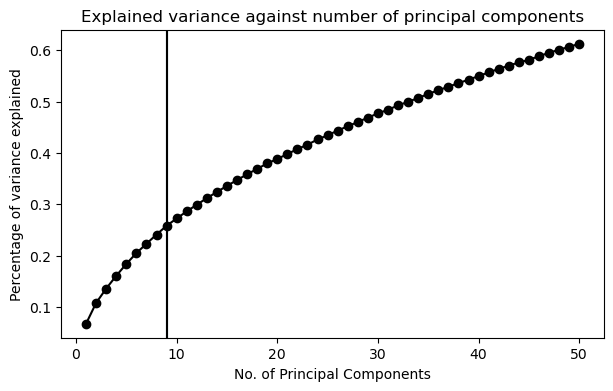

In [29]:
optimize_pca(df_norm)
plt.axvline(x=9, color = 'black')

###### From the plot, the elbow point of the curve gives 9  as the optimal number of Principal Components

In [30]:
pca_df = final_pca(df_norm, 9)

Total percentage of variance explained with 9 principal components: 0.258


In [31]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Communication Services-Communication Services - 000063.SZ.csv,7.857900,0.138052,-8.915071,-5.248469,-1.137718,-3.020395,-4.898934,-0.080741,-4.999422
Communication Services-Communication Services - 002027.SZ.csv,6.605081,5.906667,0.720333,0.385380,-5.553724,-1.947748,22.681552,4.645677,-16.202836
Communication Services-Communication Services - 002555.SZ.csv,13.845929,1.025797,-5.893433,0.457956,-1.047510,6.550915,2.245319,9.481459,15.559501
Communication Services-Communication Services - 600050.SH.csv,-3.810636,-6.043157,-4.496717,0.742835,0.836636,1.967669,-0.413968,-0.660948,-2.477900
Consumer Discretionary-Consumer Discretionary - 000333.SZ.csv,-6.966561,10.556175,-0.514393,-1.768050,-4.682609,-1.931595,-4.663973,1.374613,-2.879740
...,...,...,...,...,...,...,...,...,...
Utilities-Utilities - 600674.SH.csv,-7.036577,0.669035,1.631934,1.503919,4.631911,4.489224,-1.083109,-0.701681,0.189422
Utilities-Utilities - 600795.SH.csv,-6.908160,-4.832037,1.338971,2.046920,4.125280,4.526240,-0.711599,-1.576644,-0.645915
Utilities-Utilities - 600803.SH.csv,3.643564,-2.855853,6.436633,2.528505,0.163290,-1.889929,0.951217,4.415391,2.655167
Utilities-Utilities - 600886.SH.csv,-8.064748,1.097403,1.504033,4.567418,3.494279,6.257307,8.934754,0.493705,-7.153331


<Axes: xlabel='PC1', ylabel='PC2'>

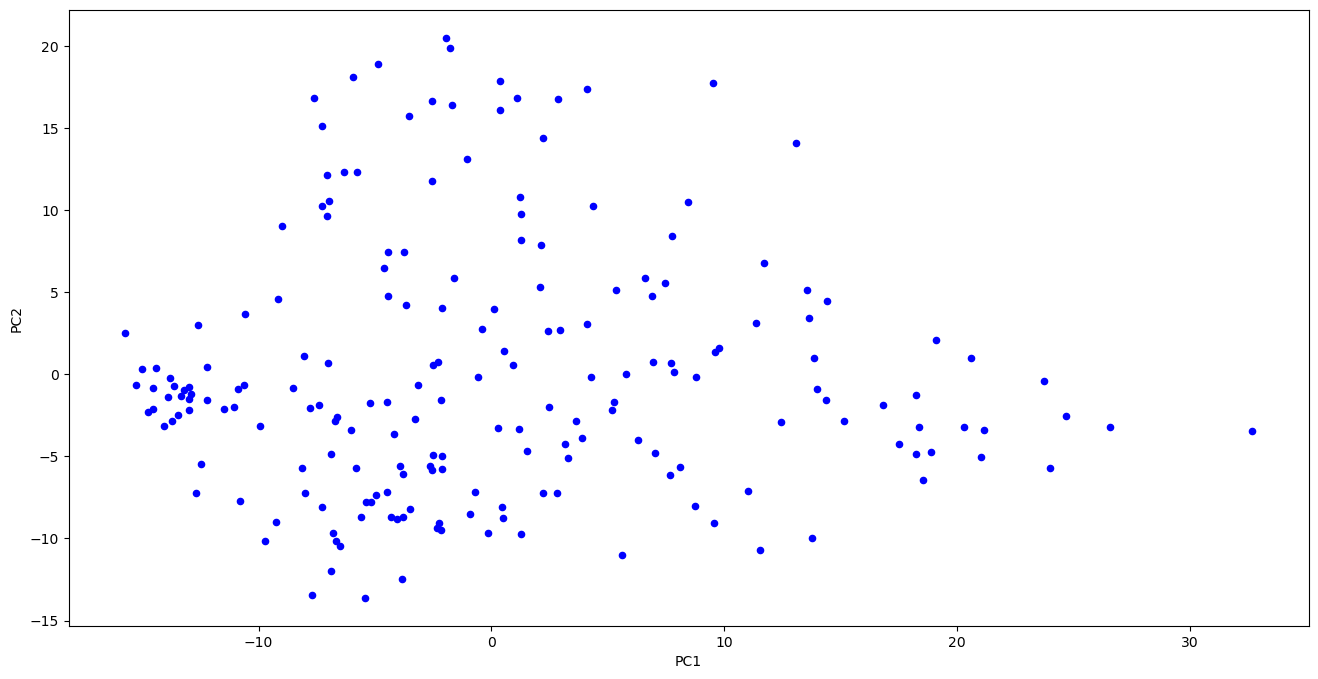

In [32]:
pca_df.plot('PC1', 'PC2', marker = 'o', color = 'blue', kind = 'scatter', figsize = (16,8))

## Clustering

In [33]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Communication Services-Communication Services - 000063.SZ.csv,7.857900,0.138052,-8.915071,-5.248469,-1.137718,-3.020395,-4.898934,-0.080741,-4.999422
Communication Services-Communication Services - 002027.SZ.csv,6.605081,5.906667,0.720333,0.385380,-5.553724,-1.947748,22.681552,4.645677,-16.202836
Communication Services-Communication Services - 002555.SZ.csv,13.845929,1.025797,-5.893433,0.457956,-1.047510,6.550915,2.245319,9.481459,15.559501
Communication Services-Communication Services - 600050.SH.csv,-3.810636,-6.043157,-4.496717,0.742835,0.836636,1.967669,-0.413968,-0.660948,-2.477900
Consumer Discretionary-Consumer Discretionary - 000333.SZ.csv,-6.966561,10.556175,-0.514393,-1.768050,-4.682609,-1.931595,-4.663973,1.374613,-2.879740
...,...,...,...,...,...,...,...,...,...
Utilities-Utilities - 600674.SH.csv,-7.036577,0.669035,1.631934,1.503919,4.631911,4.489224,-1.083109,-0.701681,0.189422
Utilities-Utilities - 600795.SH.csv,-6.908160,-4.832037,1.338971,2.046920,4.125280,4.526240,-0.711599,-1.576644,-0.645915
Utilities-Utilities - 600803.SH.csv,3.643564,-2.855853,6.436633,2.528505,0.163290,-1.889929,0.951217,4.415391,2.655167
Utilities-Utilities - 600886.SH.csv,-8.064748,1.097403,1.504033,4.567418,3.494279,6.257307,8.934754,0.493705,-7.153331


In [34]:
silhouette_scores = {}
cluster_results = {}

In [35]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 5000,
}

def Kmeans_ParameterTesting_SSE(data):
# A list holds the SSE values for each k
    sse = []
    max_k = 20
    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs, random_state= 2023)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

  
    plt.figure(figsize=(7,4))
    plt.plot(np.arange(2, max_k, 1), sse, color = 'black')
    plt.xticks(np.arange(2,max_k,1))
    plt.title('Within-cluster sum of squares against k')
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.axvline(x = 9, color = 'black', linestyle = '--')


def Kmeans_ParameterTesting_silhouette(data):

    silhouette_coefficients = []
    max_k = 20
    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs, random_state= 2023)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(score)


    plt.figure(figsize=(16,8))
    plt.plot(range(2, max_k), silhouette_coefficients)
    plt.title("Silhouette score against k")
    plt.xlabel("Number of Clusters")
    plt.xticks(np.arange(2,max_k,1))
    plt.ylabel("Silhouette Coefficient")
    plt.show()

In [36]:
import sklearn

In [37]:
pip install threadpoolctl==3.2.0

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [38]:
sklearn.show_versions()


System:
    python: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
executable: C:\ProgramData\anaconda3\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.2.1
   setuptools: 68.0.0
        numpy: 1.24.3
        scipy: 1.10.1
       Cython: 3.0.2
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 6
         prefix: mkl_rt
       filepath: C:\ProgramData\anaconda3\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: vcomp
       filepath: C:\ProgramData\anaconda3\vcomp140.dll
        version: None

       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: libiomp
       filepath: C:\ProgramData\anaconda3\Li

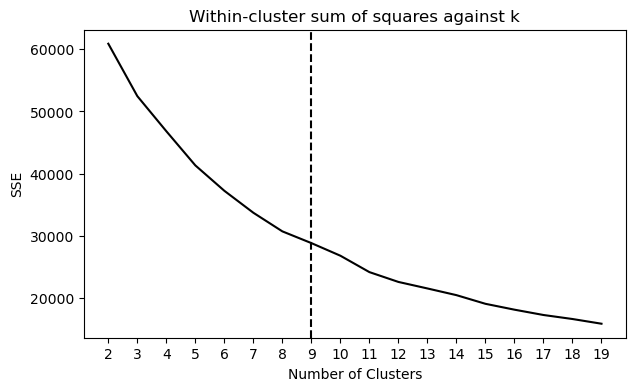

In [39]:
Kmeans_ParameterTesting_SSE(pca_df)

In [40]:
pca_df.dropna(axis = 1, inplace = True)

In [41]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Communication Services-Communication Services - 000063.SZ.csv,7.857900,0.138052,-8.915071,-5.248469,-1.137718,-3.020395,-4.898934,-0.080741,-4.999422
Communication Services-Communication Services - 002027.SZ.csv,6.605081,5.906667,0.720333,0.385380,-5.553724,-1.947748,22.681552,4.645677,-16.202836
Communication Services-Communication Services - 002555.SZ.csv,13.845929,1.025797,-5.893433,0.457956,-1.047510,6.550915,2.245319,9.481459,15.559501
Communication Services-Communication Services - 600050.SH.csv,-3.810636,-6.043157,-4.496717,0.742835,0.836636,1.967669,-0.413968,-0.660948,-2.477900
Consumer Discretionary-Consumer Discretionary - 000333.SZ.csv,-6.966561,10.556175,-0.514393,-1.768050,-4.682609,-1.931595,-4.663973,1.374613,-2.879740
...,...,...,...,...,...,...,...,...,...
Utilities-Utilities - 600674.SH.csv,-7.036577,0.669035,1.631934,1.503919,4.631911,4.489224,-1.083109,-0.701681,0.189422
Utilities-Utilities - 600795.SH.csv,-6.908160,-4.832037,1.338971,2.046920,4.125280,4.526240,-0.711599,-1.576644,-0.645915
Utilities-Utilities - 600803.SH.csv,3.643564,-2.855853,6.436633,2.528505,0.163290,-1.889929,0.951217,4.415391,2.655167
Utilities-Utilities - 600886.SH.csv,-8.064748,1.097403,1.504033,4.567418,3.494279,6.257307,8.934754,0.493705,-7.153331


<Axes: title={'center': 'K means cluster results for k = 9'}, xlabel='PC1', ylabel='PC2'>

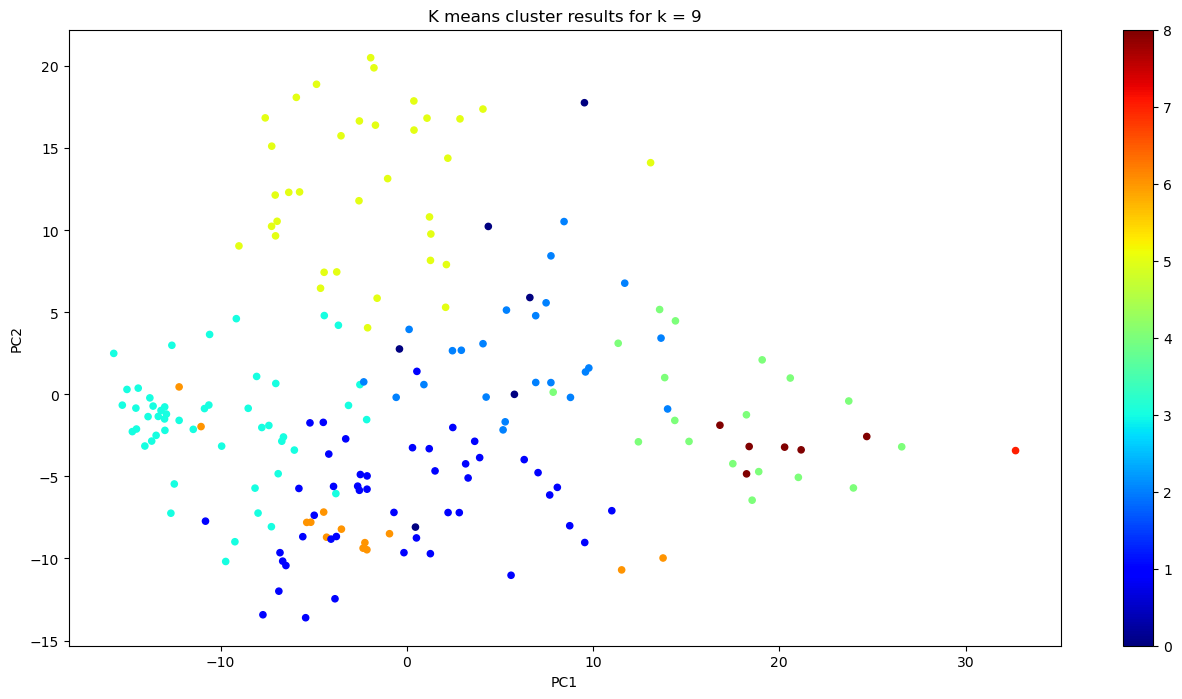

In [42]:
final_kmeans = KMeans(n_clusters = 9, **kmeans_kwargs, random_state= 2023)
final_kmeans.fit(pca_df)
#silhouette_scores['KMeans'] = silhouette_score(pca_df, final_kmeans.labels_)
cluster_results['KMeans'] = final_kmeans.predict(pca_df)

pca_df.plot('PC1', 'PC2', c = final_kmeans.labels_, kind = 'scatter', figsize = (16,8), cmap = 'jet', title = 'K means cluster results for k = 9')

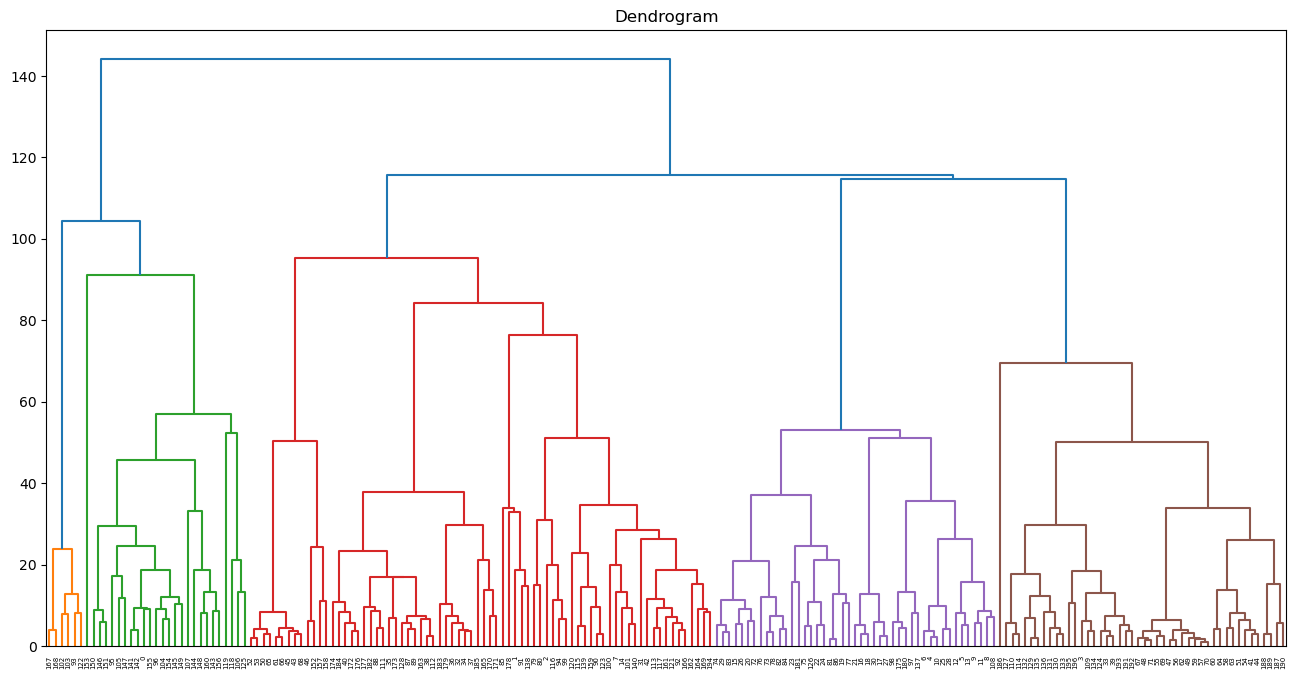

In [43]:
def draw_dendrogram(df):
  link = linkage(df, method = 'ward')

  plt.figure(figsize = (16,8))
  plt.title("Dendrogram")
  dendrogram(link, orientation = 'top', distance_sort = 'decreasing', show_leaf_counts = True)

draw_dendrogram(pca_df)

<Axes: xlabel='PC1', ylabel='PC2'>

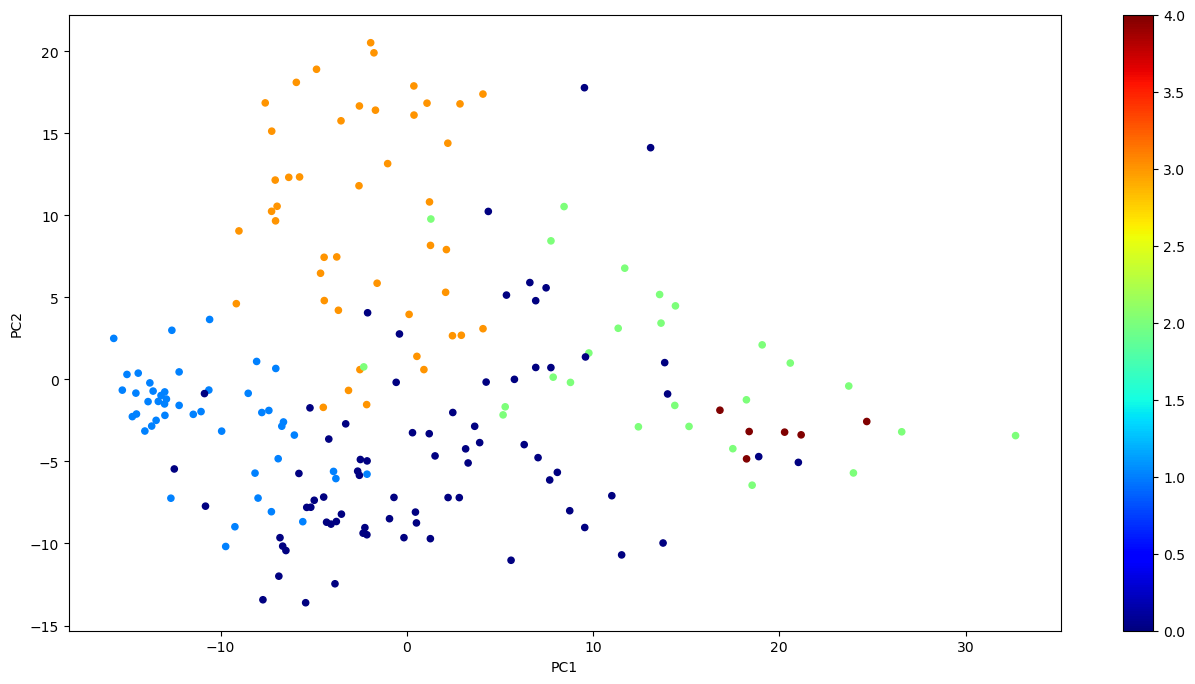

In [45]:
final_agglo = AgglomerativeClustering(n_clusters = 5)
results = final_agglo.fit_predict(pca_df)

cluster_results['Agglo'] = results

pca_df.plot('PC1', 'PC2', marker = 'o', color = results, kind = 'scatter', cmap='jet', figsize = (16,8))

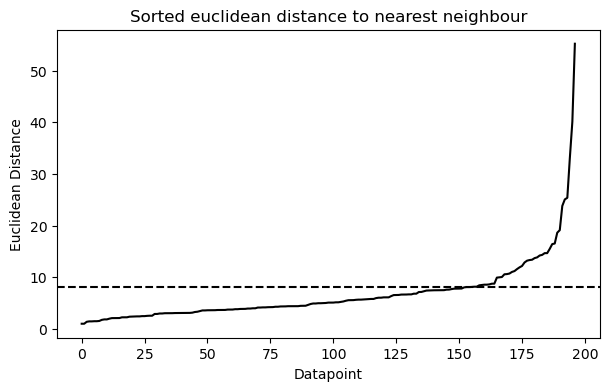

In [46]:
def optimal_epsilon(data):
  plt.figure(figsize=(7,4))
  nn = NearestNeighbors(n_neighbors=2).fit(data)
  distances, idx = nn.kneighbors(data)
  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  plt.plot(distances, color = 'black')
  plt.title("Sorted euclidean distance to nearest neighbour")
  plt.xlabel("Datapoint")
  plt.ylabel("Euclidean Distance")


optimal_epsilon(pca_df)
plt.axhline(y=8, color='black', linestyle='--')

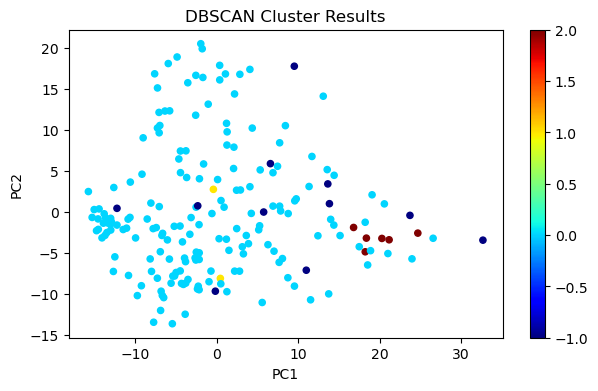

Estimated number of clusters: 3
Estimated number of noise points: 11


In [47]:
def get_dbscan(data, eps, min_samples):
  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  results = dbscan.fit_predict(data)
  # Plot the cluster results.
  fig, ax = plt.subplots(figsize=(7,4))
  data.plot(x="PC1", y="PC2", kind="scatter", 
  title=f"DBSCAN Cluster Results", c=results, cmap="jet", ax=ax)
  plt.show()

  labels = dbscan.labels_
  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  #print("Silhouette Coefficient: %0.3f" % silhouette_score(data, labels))

  return results, labels

#eps = 3 , min_samples = 2 as we want to identify at least a pair of securities in the cluster
dbscan_cluster, labels = get_dbscan(pca_df,15,2)

In [48]:
cluster_results['DBSCAN'] = dbscan_cluster

In [49]:
def map_clusters(cluster_result: np.array) -> typing.List[typing.List[str]]:
  grouping = [[] for _ in range(max(cluster_result) + 1)]
  for i, res in enumerate(cluster_result):
    grouping[res].append(pca_df.index[i])


  return grouping

In [50]:
groups = {}
for algorithm, cluster_result in cluster_results.items():
  groups[algorithm] = map_clusters(cluster_result)
print("Number of clusters:", {k:len(v) for k,v in groups.items()})
print('Example of cluster:', groups['KMeans'][0])

Number of clusters: {'KMeans': 9, 'Agglo': 5, 'DBSCAN': 3}
Example of cluster: ['Communication Services-Communication Services - 002027.SZ.csv', 'Healthcare-Healthcare - 300142.SZ.csv', 'Healthcare-Healthcare - 600763.SH.csv', 'Industry-Industry - 000786.SZ.csv', 'Industry-Industry - 601919.SH.csv', 'Materials-Materials - 600346.SH.csv']


In [51]:
len(groups['DBSCAN'][0])

178

In [52]:
'''Getting all pairwise combinations within each cluster for each clustering algorithm'''

def find_pairs(algorithm: str, groups: typing.Dict[str,typing.List[typing.List[str]]]) -> pd.core.series.Series:
    total_pairs = []
    for i in range(len(groups[algorithm])):
        pairs = list(combinations(groups[algorithm][i],2))
        #pairs = list(chain.from_iterable(combos))
        total_pairs += pairs

    print(f"Found {len(total_pairs)} potential pairs")

    total_pairs = pd.Series(total_pairs)
    
    print(total_pairs)
    
    return total_pairs

In [53]:
total_pairs = find_pairs('KMeans', groups)

Found 3320 potential pairs
0       (Communication Services-Communication Services...
1       (Communication Services-Communication Services...
2       (Communication Services-Communication Services...
3       (Communication Services-Communication Services...
4       (Communication Services-Communication Services...
                              ...                        
3315    (Industry-Industry - 300014.SZ.csv, Materials-...
3316    (Industry-Industry - 300014.SZ.csv, Materials-...
3317    (Industry-Industry - 600884.SH.csv, Materials-...
3318    (Industry-Industry - 600884.SH.csv, Materials-...
3319    (Materials-Materials - 002460.SZ.csv, Material...
Length: 3320, dtype: object


In [54]:
def find_suitable_pairs(df: pd.DataFrame, pairs: pd.core.series.Series) -> pd.core.frame.DataFrame:
    
    # 1. Statistically significant t-stat from the Engle-Granger test (5% level)
    
    engle_granger_tests = []
    norm_spreads = []

    for pair in pairs: # Test each pair for cointegration

        security_0 = df[pair[0]]
        security_1 = df[pair[1]]
        
        # Get independent and dependent variables
        # for OLS calculation and corresponding
        # pvalue for Engle-Granger tests

        test_0 = ts.coint(security_0, security_1)
        test_1 = ts.coint(security_1, security_0)

        t_stat_0, pvalue_0 = test_0[0], test_0[1]
        t_stat_1, pvalue_1 = test_1[0], test_1[1]

        # Choose smallest t-stat for Engle-Granger Test
        if abs(t_stat_0) < abs(t_stat_1):
            pvalue = pvalue_0
            x = sm.add_constant(np.asarray(security_1))
            y = np.asarray(security_0)
        else:
            pvalue = pvalue_1
            x = sm.add_constant(np.asarray(security_0))
            y = np.asarray(security_1)

        engle_granger_tests.append(pvalue)

        # Get parameters and calculate spread
        model = sm.OLS(y, x)
        result = model.fit()
        alpha, beta = result.params[0], result.params[1]

        spread = y - (alpha + beta*x.T[1])
        norm_spread = (spread - np.mean(spread))/np.std(spread)
        norm_spreads.append(norm_spread)

    # Convert spreads from list to dataframe
    norm_spreads = pd.DataFrame(np.transpose(norm_spreads),
                                index=df.index)

    engle_granger_tests = pd.Series(engle_granger_tests)


    
    # 2.Hurst exponent < 0.5

    hurst_exponents = []

    for col in norm_spreads.columns:

            # Create the range of lag values
            lags = range(2, 100)

            # Calculate the array of the variances of the lagged differences
            diffs = [np.subtract(norm_spreads[col].values[l:], norm_spreads[col].values[:-l]) for l in lags]
            tau = [np.sqrt(np.std(diff)) for diff in diffs]

            # Use a linear fit to estimate the Hurst Exponent
            poly = np.polyfit(np.log(lags), np.log(tau), 1)

            # Get the Hurst exponent from the polyfit output
            hurst_exponents.append(poly[0]*2.0)

    hurst_exponents = pd.Series(hurst_exponents)


    
    # 3. Half-life between [1, 252]
    
    lag = norm_spreads.shift(1)
    lag.loc[lag.index[0]] = lag.loc[lag.index[1]]

    ret = norm_spreads - lag
    lag = sm.add_constant(lag)

    model = sm.OLS(ret, lag)
    result = model.fit()
    half_lives = -np.log(2)/result.params.iloc[1]


    
    # 4. Spread must cross the mean on average 12x per year

    mean = 0
    curr_period = norm_spreads
    next_period = norm_spreads.shift(-1)
    count = (
        ((curr_period >= mean) & (next_period < mean)) |  # Over to under
        ((curr_period < mean) & (next_period >= mean)) |  # Under to over
        (curr_period == mean)
        ).sum()
    trading_year = 252
    avg_cross_count = count/(len(df)/trading_year)

    
    
    # Filtering Pairs

    max_pvalue = 0.05
    max_hurst_exp = 0.5
    max_half_life = 252.0
    min_half_life = 1.0
    min_avg_cross = 12.0

    # Generate summary dataframe of potential trading pairs
    pairs_df = pd.concat([pairs,
                          engle_granger_tests,
                          hurst_exponents,
                          half_lives,
                          avg_cross_count],
                         axis=1)
    pairs_df.columns = ['pair',
                        'pvalue',
                        'hurst_exp',
                        'half_life',
                        'avg_cross_count']
    # Find pairs that meet user defined criteria
    filtered_pairs = pairs_df.loc[
        # Significant Engle-Grange test AND
        (pairs_df['pvalue'] <= max_pvalue) &
        # Mean reverting according to Hurst exponent AND
        (pairs_df['hurst_exp'] < max_hurst_exp) &
        # Half-life above minimum value AND
        # Half-life below maximum value AND
        ((pairs_df['half_life'] >= min_half_life) &
         (pairs_df['half_life'] <= max_half_life)) &
        # Produces sufficient number of trading opportunities
        (pairs_df['avg_cross_count'] >= min_avg_cross)]


    if len(filtered_pairs) == 0:
        print("No tradable pairs.")
    else:
        n_pairs = len(filtered_pairs)
        print(f"{n_pairs} tradable pairs found.")
        print(filtered_pairs)
    
    return pairs_df, filtered_pairs

In [55]:
pairs_df, filtered_pairs = find_suitable_pairs(df_T.T, total_pairs)

1815 tradable pairs found.
                                                   pair        pvalue  \
0     (Communication Services-Communication Services...  1.024104e-03   
2     (Communication Services-Communication Services...  1.370479e-05   
5     (Healthcare-Healthcare - 300142.SZ.csv, Health...  2.835066e-02   
6     (Healthcare-Healthcare - 300142.SZ.csv, Indust...  1.871553e-02   
7     (Healthcare-Healthcare - 300142.SZ.csv, Indust...  2.565211e-02   
...                                                 ...           ...   
3310  (Industry-Industry - 002709.SZ.csv, Industry-I...  0.000000e+00   
3314  (Industry-Industry - 300014.SZ.csv, Industry-I...  0.000000e+00   
3315  (Industry-Industry - 300014.SZ.csv, Materials-...  0.000000e+00   
3316  (Industry-Industry - 300014.SZ.csv, Materials-...  0.000000e+00   
3317  (Industry-Industry - 600884.SH.csv, Materials-...  1.813381e-29   

      hurst_exp   half_life  avg_cross_count  
0      0.045492    1.693115       111.770021  
2 

In [56]:
filtered_pairs

,pair,pvalue,hurst_exp,half_life,avg_cross_count
0,(Communication Services-Communication Services...,1.024104e-03,0.045492,1.693115,111.770021
2,(Communication Services-Communication Services...,1.370479e-05,0.028210,2.532232,111.252567
5,"(Healthcare-Healthcare - 300142.SZ.csv, Health...",2.835066e-02,0.066402,4.820998,96.936345
6,"(Healthcare-Healthcare - 300142.SZ.csv, Indust...",1.871553e-02,0.028967,8.024377,103.663244
7,"(Healthcare-Healthcare - 300142.SZ.csv, Indust...",2.565211e-02,0.097647,8.811799,106.595483
...,...,...,...,...,...
3310,"(Industry-Industry - 002709.SZ.csv, Industry-I...",0.000000e+00,0.000400,157.778025,128.845996
3314,"(Industry-Industry - 300014.SZ.csv, Industry-I...",0.000000e+00,0.005210,11.634979,126.776181
3315,"(Industry-Industry - 300014.SZ.csv, Materials-...",0.000000e+00,0.007635,51.272003,124.188912
3316,"(Industry-Industry - 300014.SZ.csv, Materials-...",0.000000e+00,0.006595,59.069991,119.531828


In [57]:
filtered_pairs_dict = {}
filtered_pairs_dict['KMeans'] = filtered_pairs

In [58]:
pairs_statistic = {}
pairs_statistic['Total possible pairs'] = {'KMeans': 5666}
pairs_statistic['Tradable pairs'] = {'KMeans': 1202}

In [59]:
pairs_statistic

{'Total possible pairs': {'KMeans': 5666}, 'Tradable pairs': {'KMeans': 1202}}

In [60]:
algos = list(groups.keys())[1:]
algos

['Agglo', 'DBSCAN']

In [61]:
for algo in algos:
    total_pairs = find_pairs(algo, groups)
    pairs_statistic['Total possible pairs'][algo] = len(total_pairs)
    pairs_df, filtered_pairs = find_suitable_pairs(df_T.T, total_pairs)
    pairs_statistic['Tradable pairs'][algo] = len(filtered_pairs)
    filtered_pairs_dict[algo] = filtered_pairs
    
    

Found 5066 potential pairs
0       (Communication Services-Communication Services...
1       (Communication Services-Communication Services...
2       (Communication Services-Communication Services...
3       (Communication Services-Communication Services...
4       (Communication Services-Communication Services...
                              ...                        
5061    (Industry-Industry - 300014.SZ.csv, Materials-...
5062    (Industry-Industry - 300014.SZ.csv, Materials-...
5063    (Industry-Industry - 600884.SH.csv, Materials-...
5064    (Industry-Industry - 600884.SH.csv, Materials-...
5065    (Materials-Materials - 002460.SZ.csv, Material...
Length: 5066, dtype: object
69 tradable pairs found.
                                                 pair    pvalue  hurst_exp  \
0   (Communication Services-Communication Services...  0.006741   0.053243   
1   (Communication Services-Communication Services...  0.032566   0.054124   
2   (Communication Services-Communication Servic

In [68]:
import pickle
pickle.dump(filtered_pairs_dict, open('filtered_pairs_dict.pickle', 'wb'))
pickle.dump(pairs_statistic, open('pairs_statistic.pickle', 'wb'))

In [1]:
import pickle

In [3]:
pair_statistics = pickle.load(open("pairs_statistic.pickle", "rb"))

In [5]:
import pandas as pd

In [6]:
pd.DataFrame(pair_statistics)

,Total possible pairs,Tradable pairs
KMeans,5666,1202
Agglo,5066,69
DBSCAN,15890,165


In [69]:
test = pickle.load(open('filtered_pairs_dict.pickle', 'rb'))
test

{'KMeans':                                                    pair        pvalue  \
 0     (Communication Services-Communication Services...  1.024104e-03   
 2     (Communication Services-Communication Services...  1.370479e-05   
 5     (Healthcare-Healthcare - 300142.SZ.csv, Health...  2.835066e-02   
 6     (Healthcare-Healthcare - 300142.SZ.csv, Indust...  1.871553e-02   
 7     (Healthcare-Healthcare - 300142.SZ.csv, Indust...  2.565211e-02   
 ...                                                 ...           ...   
 3310  (Industry-Industry - 002709.SZ.csv, Industry-I...  0.000000e+00   
 3314  (Industry-Industry - 300014.SZ.csv, Industry-I...  0.000000e+00   
 3315  (Industry-Industry - 300014.SZ.csv, Materials-...  0.000000e+00   
 3316  (Industry-Industry - 300014.SZ.csv, Materials-...  0.000000e+00   
 3317  (Industry-Industry - 600884.SH.csv, Materials-...  1.813381e-29   
 
       hurst_exp   half_life  avg_cross_count  
 0      0.045492    1.693115       111.770021  
 2  

In [70]:
def test_names(iterable):
    top_path = 'C:/Users/user/OneDrive - National University of Singapore/Documents/GitHub/QF5206_chinamarket/individual_data/'
    all_paths = set()
    dfs = []
    for tup in iterable:
        stock1,stock2 = tup[0].replace('-','/', 1), tup[1].replace('-','/',1)
        path1, path2 = top_path + stock1, top_path + stock2
        all_paths.add((tup[0],path1))
        all_paths.add((tup[1],path2))
    for symbol, path in all_paths:

        df = pd.read_csv(path, parse_dates = ['Date'])
        df['Date'] = df['Date'].apply(lambda x: x.replace(tzinfo = None))
        df = df.set_index("Date", drop=True)
        df[symbol] = df['Returns']
        # Log returns

        dfs.append(df[symbol])
    df = pd.concat(dfs, axis=1)
    df = df[start_test:end_test]
    return df



kmeans_df = test_names(test['KMeans']['pair'])
agglo_df = test_names(test['Agglo']['pair'])
dbscan_df = test_names(test['DBSCAN']['pair'])

In [71]:
kmeans_df

,Materials-Materials - 002601.SZ.csv,Healthcare-Healthcare - 300015.SZ.csv,Healthcare-Healthcare - 601607.SH.csv,Materials-Materials - 601899.SH.csv,Finance-Finance - 600030.SH.csv,Materials-Materials - 600362.SH.csv,Information Technology-Information Technology - 000733.SZ.csv,Materials-Materials - 600346.SH.csv,Utilities-Utilities - 600795.SH.csv,Industry-Industry - 002459.SZ.csv,...,Energy-Energy - 000723.SZ.csv,Industry-Industry - 300207.SZ.csv,Information Technology-Information Technology - 000725.SZ.csv,Materials-Materials - 000301.SZ.csv,Materials-Materials - 600585.SH.csv,Healthcare-Healthcare - 600276.SH.csv,Information Technology-Information Technology - 002371.SZ.csv,Consumer Staples-Consumer Staples - 002304.SZ.csv,Finance-Finance - 601166.SH.csv,Industry-Industry - 601111.SH.csv
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.046358,-0.093283,-0.005746,0.077639,-0.007511,0.069227,0.058093,0.017016,-0.017938,0.056804,...,0.036742,0.032989,-0.013423,-0.027809,0.012705,-0.002335,0.064334,0.045518,-0.060235,-0.012089
2021-01-05,0.085873,0.012238,0.004703,0.016791,-0.001372,-0.018410,-0.058943,0.095470,-0.022884,-0.018500,...,-0.035246,-0.014279,0.039740,0.062027,-0.009031,0.018091,0.026115,0.065505,-0.041034,-0.001352
2021-01-06,0.016940,0.034582,0.006237,0.028008,0.016338,0.003804,0.020036,0.028038,0.004619,-0.061659,...,-0.045880,-0.035457,-0.003252,0.095218,0.075623,0.004318,-0.029389,-0.027294,0.045097,-0.005427
2021-01-07,0.028700,0.079429,-0.022002,0.062751,0.004379,0.079349,-0.004846,0.025155,0.000000,0.024092,...,-0.004706,-0.007311,0.004874,0.058496,-0.017147,0.011193,-0.008258,-0.002341,0.018579,-0.020619
2021-01-08,0.027105,-0.019175,0.007388,0.015091,0.010366,0.085256,-0.008073,-0.019578,0.000000,-0.071186,...,0.004706,0.000667,0.041276,0.034368,0.027296,-0.015599,-0.017418,-0.054299,0.010886,0.013793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.003163,-0.010003,0.044428,-0.012195,-0.006082,-0.001192,0.060428,0.001253,0.038124,0.080787,...,0.014421,0.022969,0.005882,0.036033,-0.010657,0.021801,0.026905,-0.022881,-0.005231,0.010620
2022-12-27,0.016702,0.029064,-0.038903,0.027233,0.023613,0.034001,-0.001572,0.006864,0.000000,0.010589,...,0.016385,-0.026163,0.005848,0.007502,0.005343,-0.013132,0.016664,0.018630,0.015612,-0.024055
2022-12-28,-0.005189,-0.003587,-0.007188,-0.004988,-0.004479,0.016577,-0.007633,-0.008117,0.036724,0.012662,...,-0.013086,-0.011954,-0.011730,-0.012030,-0.008204,0.008863,-0.012027,-0.008618,0.010274,-0.039545


In [72]:
agglo_df

,Materials-Materials - 002601.SZ.csv,Materials-Materials - 000408.SZ.csv,Information Technology-Information Technology - 601360.SH.csv,Healthcare-Healthcare - 300122.SZ.csv,Information Technology-Information Technology - 300033.SZ.csv,Materials-Materials - 601899.SH.csv,Finance-Finance - 300059.SZ.csv,Materials-Materials - 000708.SZ.csv,Energy-Energy - 601088.SH.csv,Finance-Finance - 002736.SZ.csv,...,Finance-Finance - 600837.SH.csv,Industry-Industry - 600150.SH.csv,Materials-Materials - 600585.SH.csv,Industry-Industry - 000425.SZ.csv,Industry-Industry - 600031.SH.csv,Industry-Industry - 600406.SH.csv,Materials-Materials - 600019.SH.csv,Materials-Materials - 603993.SH.csv,Materials-Materials - 600309.SH.csv,Materials-Materials - 002493.SZ.csv
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.046358,-0.012563,0.001272,-0.032222,0.016400,0.077639,0.037979,0.062701,-0.001111,-0.001467,...,0.007746,0.031713,0.012705,0.034770,-0.005159,0.004506,0.023257,0.043825,0.033272,-0.006176
2021-01-05,0.085873,0.010063,-0.019256,-0.024312,0.009555,0.016791,0.007117,0.017942,-0.019080,0.001467,...,-0.006192,-0.001644,-0.009031,0.017826,0.049064,0.015982,-0.024939,-0.024807,0.036512,0.049762
2021-01-06,0.016940,-0.013863,0.060968,0.077872,-0.004411,0.028008,0.020449,0.018457,0.016854,0.009486,...,0.000776,0.015243,0.075623,-0.012445,0.011155,-0.031083,0.001682,0.057943,0.008162,0.024320
2021-01-07,0.028700,0.010101,-0.029077,-0.009709,0.023791,0.062751,0.047206,0.079851,0.017123,-0.000726,...,-0.002330,0.008071,-0.017147,0.021240,0.088746,0.034028,0.066637,0.086517,0.083491,0.028359
2021-01-08,0.027105,-0.025447,0.094568,0.014595,-0.006651,0.015091,-0.023325,0.009548,0.020060,0.005074,...,0.005428,-0.027161,0.027296,-0.014110,-0.000495,0.022538,0.030962,0.005420,0.018613,-0.011247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.003163,0.033265,-0.007628,0.002222,0.023997,-0.012195,0.000000,0.012873,0.000000,-0.001141,...,0.003482,0.026607,-0.010657,0.005935,0.004328,0.046706,-0.021429,-0.002205,0.016417,-0.008375
2022-12-27,0.016702,0.020949,0.001530,0.022867,-0.002817,0.027233,0.021830,-0.001163,0.014353,0.009091,...,0.008079,0.003164,0.005343,0.009814,-0.001852,-0.007045,0.010772,0.019673,0.017132,0.045219
2022-12-28,-0.005189,-0.009088,-0.020078,-0.003088,-0.002522,-0.004988,-0.006706,0.007538,0.003201,0.004515,...,-0.004608,0.004502,-0.008204,-0.009814,-0.021238,-0.009471,0.005343,0.006473,0.011045,-0.015391


In [73]:
dbscan_df

,Materials-Materials - 002601.SZ.csv,Healthcare-Healthcare - 300015.SZ.csv,Materials-Materials - 601899.SH.csv,Finance-Finance - 600030.SH.csv,Materials-Materials - 600362.SH.csv,Information Technology-Information Technology - 000733.SZ.csv,Industry-Industry - 002459.SZ.csv,Finance-Finance - 600999.SH.csv,Healthcare-Healthcare - 300142.SZ.csv,Materials-Materials - 600426.SH.csv,...,Industry-Industry - 601877.SH.csv,Finance-Finance - 000617.SZ.csv,Information Technology-Information Technology - 600183.SH.csv,Industry-Industry - 300207.SZ.csv,Information Technology-Information Technology - 000725.SZ.csv,Materials-Materials - 000301.SZ.csv,Materials-Materials - 600585.SH.csv,Information Technology-Information Technology - 002371.SZ.csv,Consumer Staples-Consumer Staples - 002304.SZ.csv,Finance-Finance - 601166.SH.csv
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.046358,-0.093283,0.077639,-0.007511,0.069227,0.058093,0.056804,0.012348,-0.006766,-0.007805,...,0.032411,-0.005917,-0.008917,0.032989,-0.013423,-0.027809,0.012705,0.064334,0.045518,-0.060235
2021-01-05,0.085873,0.012238,0.016791,-0.001372,-0.018410,-0.058943,-0.018500,-0.009781,-0.007075,0.072679,...,-0.019219,-0.005952,0.025121,-0.014279,0.039740,0.062027,-0.009031,0.026115,0.065505,-0.041034
2021-01-06,0.016940,0.034582,0.028008,0.016338,0.003804,0.020036,-0.061659,0.038563,0.016430,0.027752,...,0.013020,0.013343,-0.032673,-0.035457,-0.003252,0.095218,0.075623,-0.029389,-0.027294,0.045097
2021-01-07,0.028700,0.079429,0.062751,0.004379,0.079349,-0.004846,0.024092,-0.001234,-0.015904,0.035058,...,0.009901,-0.013343,0.011486,-0.007311,0.004874,0.058496,-0.017147,-0.008258,-0.002341,0.018579
2021-01-08,0.027105,-0.019175,0.015091,0.010366,0.085256,-0.008073,-0.071186,-0.004539,0.019777,0.007522,...,-0.047154,0.004468,0.041250,0.000667,0.041276,0.034368,0.027296,-0.017418,-0.054299,0.010886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.003163,-0.010003,-0.012195,-0.006082,-0.001192,0.060428,0.080787,0.001529,-0.004764,0.010909,...,0.022815,0.005186,0.016283,0.022969,0.005882,0.036033,-0.010657,0.026905,-0.022881,-0.005231
2022-12-27,0.016702,0.029064,0.027233,0.023613,0.034001,-0.001572,0.010589,0.009882,-0.019541,0.036821,...,0.015666,-0.012142,0.000000,-0.026163,0.005848,0.007502,0.005343,0.016664,0.018630,0.015612
2022-12-28,-0.005189,-0.003587,-0.004988,-0.004479,0.016577,-0.007633,0.012662,-0.003030,0.002048,-0.012325,...,0.034913,-0.014060,-0.008787,-0.011954,-0.011730,-0.012030,-0.008204,-0.012027,-0.008618,0.010274
